Enter value for m :0.7
Enter value for c :5


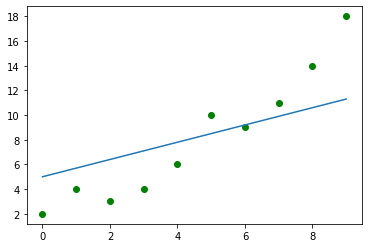

In [4]:
import matplotlib.pyplot as plt

x =[i for i in range(10)]
y =[2,4,3,4,6,10,9,11,14,18]

m=float(input('Enter value for m :'))
c=float(input('Enter value for c :'))
a=m*0+c
b=m*9+c

plt.scatter(x, y, c='green')
plt.plot([0,9],[a,b])

plt.show()

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('./Fish.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
51,Roach,180.0,23.6,25.2,27.9,7.0866,3.9060
109,Perch,514.0,30.5,32.8,34.0,10.0300,6.0180
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
18,Bream,610.0,30.9,33.5,38.6,15.6330,5.1338
136,Pike,540.0,40.1,43.0,45.8,7.7860,5.1296
105,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
88,Perch,130.0,20.0,22.0,23.5,6.1100,3.5250
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


**Meanings of the Columns:**
* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm

In [6]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
Species      156 non-null object
Weight       156 non-null float64
LengthVer    156 non-null float64
LengthDia    156 non-null float64
LengthCro    156 non-null float64
Height       156 non-null float64
Width        156 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB


In [8]:
print(str('NaN value in the dataset: '), df.isnull().values.any())

NaN value in the dataset:  False


In [11]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp

,Species
Perch,56
Bream,35
Roach,20
Smelt,14
Pike,14
Parkki,11
Whitefish,6


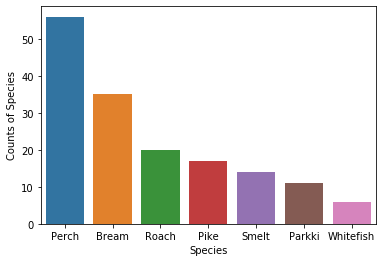

In [9]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [14]:
y = df['Weight']
X = df.iloc[:,2:7]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -494.4408572188626
Model coefficients:  [ 62.41527657  -7.41179795 -31.06023916  26.90956775  42.23999841]


In [20]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -494.44 + 62.42*X1 -7.41*X2 -31.06*X3 + 26.91*X4 + 42.24*X5


In [21]:
y_head = reg.predict(X_train)

In [22]:
r2_score(y_train, y_head)

0.8888919014691642

In [23]:
y_pred = reg.predict(X_test)

In [24]:
print(r2_score(y_test, y_pred))

0.8542092608109686


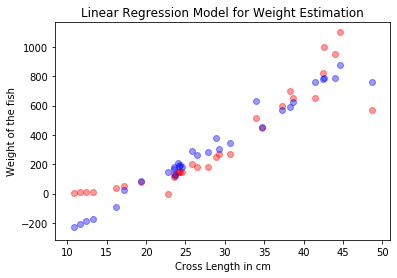

In [25]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

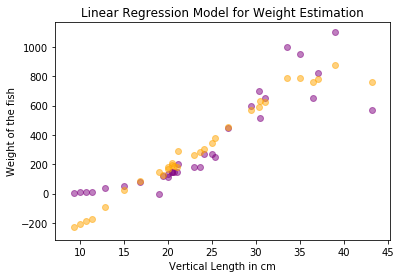

In [26]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

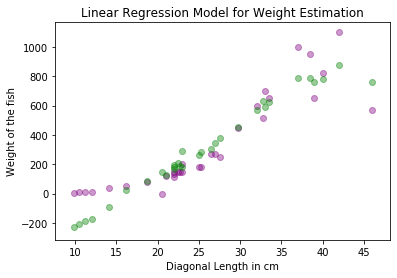

In [27]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');